<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_adatelemzes_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>

# Python adatelemzés adat elemzőknek / Python for Data Analysis 


## pandas használata

<https://klajosw.blogspot.com/>

---

---


# Python elemzés első lépése / Python for Data Analysis first step

----

In [ ]:
## Python modulok betöltése / Import Python Libraries
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# Panda csomag részei

- Series    (1D tömb / 1d array)
- DataFrame (2D tömb / 2d labeled array)
- Panel     (3D tömb / general 3d array)

---


## Panda sorozatok / Pandas Series


A Pandas Series egydimenziós és címkével ellátott tömb, amely többnyire azonos típusú adatokat tartalmaz 
(egész számok, karakterláncok, lebegőpontos számok, Python-objektumok stb.). 
A tengely címkéket indexnek is nevezik.

---

In [ ]:
# Panda sorozat létrehozása / creating Pandas series :
s1 = pd.Series( [-42,-1,1,7,42] )     ## homogén
s2 = pd.Series( [-3,-1,'Lajos',1,5] ) ## inhomogén / heterogeneous
print('S1\n',s1)
print('-----------')
print('S2\n',s2)

S1
 0   -42
1    -1
2     1
3     7
4    42
dtype: int64
-----------
S2
 0       -3
1       -1
2    Lajos
3        1
4        5
dtype: object


In [ ]:
# Index használata / View index values
print('Nincs index : ', s1.index)  ## nincs index

new_index =['a2', 'b2', 'c2', 'd2', 'e2'] 

# index beállítása / set the index 
s1.index=['a1', 'b1', 'c1', 'd1', 'e1'] 
s2.index = new_index 

print('Van index : ', s1.index)

Nincs index :  RangeIndex(start=0, stop=5, step=1)
Van index :  Index(['a1', 'b1', 'c1', 'd1', 'e1'], dtype='object')


In [ ]:
# panda sorozat létrehozása index megadásával / Creating Pandas series with index:
s2 = pd.Series( np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'] )
print(s2)

print( 'v1 (index) :', s2['a'],' | v2 :',  s2[0])

a    0.372578
b    1.062642
c    0.319626
d   -2.380873
e   -0.038077
dtype: float64
v1 : 0.37257833425649717  | v2 : 0.37257833425649717


In [ ]:
# Index értékek / View index values
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [ ]:

data = {'pi': 3.1415, 'e': 2.71828}  # dictionary
print(data)
print('Könyvtár : ', data['pi'])

# Pand sorozat létrehozása könyvtárból / Create a Series from dictionary
s3 = pd.Series ( data )
print(s3)
print('Panda sorozat : ', s3['pi'])

{'pi': 3.1415, 'e': 2.71828}
Könyvtár :  3.1415
pi    3.14150
e     2.71828
dtype: float64
Panda sorozat :  3.1415


In [ ]:
# Elemek átrendezése és bővítése / reordering the elements and insert
s4 = pd.Series ( data, index = ['e', 'pi', 'egyeb'])
print(s4)

## Ha nem kap értéket valami akkor használatos a panda sepciális jelzője
## NAN (non a number) - is used to specify a missing value in Pandas.


e        2.71828
pi       3.14150
egyeb        NaN
dtype: float64


In [ ]:
## pozició hivatkozás (tulhivatkozást elbírja)
print(s1[:12])      # első tizenkét elem (de csak 4 van ténylegesen)/ First 12 elements

print('--------------')

print( s1[[2,1,0]])  # elemek konkrét sorrendjének megadása / Elements out of order


a1   -42
b1    -1
c1     1
d1     7
e1    42
dtype: int64
--------------
c1     1
b1    -1
a1   -42
dtype: int64


In [ ]:
# nevezetes értékek megjelenítése ndarray szerint / Series can be used as ndarray:
print("Median:" , s4.median())

Median: 2.9298900000000003


In [ ]:
## szűrési feltétel megadása a hivatkozásban
print(s1[s1 > 0])             ## csak anullánál nagyobb értéküek jelenjenek meg

print('--------------')

print(s4[s4 > s4.median()])   ## csak a mediánnál nagyobbak jelenjenek meg

c1     1
d1     7
e1    42
dtype: int64
--------------
pi    3.1415
dtype: float64


---

#### Népszerű attribútumok és módszerek  /  Popular Attributes and Methods:

|  Attribute/Method | Description | Leírás |
|-----|-----|-----|
| dtype | data type of values in series | adat tipus |
| empty | True if series is empty | üres érték van akkor igazzat ad |
| size | number of elements | elemek száma |
| values | Returns values as ndarray | értékek visszaadása mint ndarray |
| head() | First n elements | első 5 elem |
| tail() | Last n elements | utolsó 5 elem |

---

---

## Pandas DataFrame

A Pandas DataFrame egy kétdimenziós, méretben változtatható, heterogén táblázatos adatszerkezet, címkézett sorokkal és oszlopokkal (tengelyekkel). 
Használható szótárszerű tárolóként a python sorozatú objektumok tárolására.

Pandas DataFrame is two-dimensional, size-mutable, heterogeneous tabular data structure with labeled rows and columns ( axes ). 
Can be thought of a dictionary-like container to store python Series objects.

---

In [ ]:
##  DataFrame létrehozása index nélkül / create a DataFrame without index
d =  pd.DataFrame({ 
         'Name': pd.Series(['Alice','Bob','Chris']), 
         'Age': pd.Series([ 21,25,23]), 
         'Group': pd.Series(['a','a','b']) 
          } )

## adjunk egy új oszlopot hozzá / Add a new column:
d['height'] = pd.Series([5.2,6.0,5.6])

## jelenítsük meg
print(d)

    Name  Age Group  height
0  Alice   21     a     5.2
1    Bob   25     a     6.0
2  Chris   23     b     5.6


In [ ]:
##  DataFrame létrehozása indexel / create a DataFrame with index
d2 = pd.DataFrame(np.array([['Alice','Bob','Chris'],[ 21,25,23],['a','a','b']]).T, columns=['Name','Age','Group'])

## adjunk egy új oszlopot hozzá / Add a new column:
d['height'] = pd.Series([5.2,6.0,5.6])

## jelenítsük meg
print(d)

    Name  Age Group  height
0  Alice   21     a     5.2
1    Bob   25     a     6.0
2  Chris   23     b     5.6


In [ ]:
## CSV fileből beolvasás / Read csv file
df = pd.read_csv("https://raw.githubusercontent.com/klajosw/python/master/Salaries.csv")

## beolvasoot adatok megjelenitése (első 5 sor) / Display a few first records
df.head(5)


---

In [ ]:
## adattartalom tipus allenőrzése / Check the type of a column "salary"
print( df['salary'].dtype)

print('--------------')

## összes oszloptipus kilistázása / List the types of all columns
print(df.dtypes)

print('--------------')

## oszlop nevek kilistázása / List the column names
print(df.columns)

print('--------------')

## sor cimkék és oszlop nevek kilistázása / List the row labels and the column names
print(df.axes)

print('--------------')

## Dimenziószám kiírása / Number of dimensions
print(df.ndim)

print('--------------')

## Elemek számának kiírása /Total number of elements in the Data Frame
print(df.size)

print('--------------')

## sor és oszlop számának kiírása / Number of rows and columns
print(df.shape)

print('--------------')

## Átlag számítása az összes szám tipusú mezőre / Calculate mean for all numeric columns
print(df.mean())

print('--------------')

## Alap statisztika kiírása / Output basic statistics for the numeric columns
df.describe()




int64
--------------
rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object
--------------
Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')
--------------
[RangeIndex(start=0, stop=78, step=1), Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]
--------------
2
--------------
468
--------------
(78, 6)
--------------
phd            19.705128
service        15.051282
salary     108023.782051
dtype: float64
--------------


,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


---

### Adat szeletelés és csoport képzés / Data slicing and grouping

---

In [ ]:
## meghatározott oszlop megjelenitése (név szerint megadással)  / Extract a column by name 
print(df['sex'].head())

print('--------------------')

## Csoport képzés megadott mező szerint (rank mező) / Group data using rank
df_rank = df.groupby('rank')

## Átlag számítása az összes szám tipusú mezőre rank szerint / Calculate mean for all numeric columns using rank
print(df_rank.mean())


print('--------------------')

## Egy sorban paraméter megadás (csoport képzés és számolási mód megadása) az összesre számol
print(df.groupby('sex').mean())

print('--------------------')

## Egy sorban paraméter megadás (csoport képzés és számolási mód megadása) csak a megadott oszlopra számol
print(df.groupby('sex')['salary'].mean().round(2))                         ## kerekített megjelenités

print('--------------------')

## Összetett csoportosítás képzés / Group using 2 variables - sex and rank:
print(df.groupby(['rank','sex'], sort=True)[['salary']].mean().round(2))  ## kerekített megjelenités

print('--------------------')

## Összetett csoportosítás képzés és több érték számítás / Group using 2 variables - sex and rank:
print(df.groupby(['rank','sex'], sort=True).agg({'salary': ['mean', 'min', 'max']}))


0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object
--------------------
                 phd    service         salary
rank                                          
AssocProf  15.076923  11.307692   91786.230769
AsstProf    5.052632   2.210526   81362.789474
Prof       27.065217  21.413043  123624.804348
--------------------
              phd    service         salary
sex                                        
Female  16.512821  11.564103  101002.410256
Male    22.897436  18.538462  115045.153846
--------------------
sex
Female    101002.41
Male      115045.15
Name: salary, dtype: float64
--------------------
                     salary
rank      sex              
AssocProf Female   88512.80
          Male    102697.67
AsstProf  Female   78049.91
          Male     85918.00
Prof      Female  121967.61
          Male    124690.14
--------------------
                         salary               
                           mean    min     max
rank      sex     

In [ ]:
d = {
    'Index Title': ['Apples', 'Oranges', 'Puppies', 'Ducks'],
    'Column 1': [1.1, 2.1, 3.1, 4.1],
    'Column 2': [2.1, 3.1, 4.1, 5.1]
    }

df = pd.DataFrame(d).set_index('Index Title')
print (df)

print ('--------------------')
print (df.index.name)
print (df.columns.name)

print ('--------------------')

d = {
    'Index Title': ['Apples', 'Oranges', 'Puppies', 'Ducks'],
    'Column 1': [1.2, 2.2, 3.2, 4.2],
    'Column 2': [2.2, 3.2, 4.2, 5.2]
    }

df = pd.DataFrame(d).set_index('Index Title').rename_axis('Col Name', axis=1)  ## átnevezés
print (df)

print ('--------------------')
print (df.index.name)
print (df.columns.name)
print (df.columns.values)

print ('--------------------')

grouped_multiple = df.groupby(['Index Title']).agg({'Column 2': ['mean', 'min', 'max']})
grouped_multiple.columns = ['age_mean', 'age_min', 'age_max']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)


             Column 1  Column 2
Index Title                    
Apples            1.1       2.1
Oranges           2.1       3.1
Puppies           3.1       4.1
Ducks             4.1       5.1
--------------------
Index Title
None
--------------------
Col Name     Column 1  Column 2
Index Title                    
Apples            1.2       2.2
Oranges           2.2       3.2
Puppies           3.2       4.2
Ducks             4.2       5.2
--------------------
Index Title
Col Name
['Column 1' 'Column 2']
--------------------
  Index Title  age_mean  age_min  age_max
0      Apples       2.2      2.2      2.2
1       Ducks       5.2      5.2      5.2
2     Oranges       3.2      3.2      3.2
3     Puppies       4.2      4.2      4.2


---

### Adatszűrések / Filtering

---

In [ ]:
## CSV fileből beolvasás / Read csv file
df = pd.read_csv("https://raw.githubusercontent.com/klajosw/python/master/Salaries.csv")

## feltétel megadása a szűréshez / Select observation with the value in the salary column > 120K
df_sub = df[ df['salary'] > 120000]

print (df_sub.head())

print ('--------------------')

print(df_sub.axes)

print ('--------------------')

## másik szűrési feltétel megadáss / Select data for female professors
df_w = df[ df['sex'] == 'Female']
print (df_w.head())

print ('--------------------')

## részleges megjelenítés sorok és oszlopok kijelőlése / If we want to select both rows and columns we can use method .loc
print(df.loc[10:15,['rank', 'sex','salary']])

print ('--------------------')

## részleges megjelenítés sorok és oszlopok kijelőlése /  Unlike method .loc, method iloc selects rows (and columns) by poistion:
print (df.iloc[10:15, [0,3,4,5]])


    rank discipline  phd  service   sex  salary
0   Prof          B   56       49  Male  186960
3   Prof          A   40       31  Male  131205
5   Prof          A   20       20  Male  122400
7   Prof          A   18       18  Male  126300
10  Prof          B   39       33  Male  128250
--------------------
[Int64Index([ 0,  3,  5,  7, 10, 11, 13, 14, 15, 19, 26, 27, 29, 31, 35, 36, 39,
            40, 44, 45, 49, 51, 58, 72, 75],
           dtype='int64'), Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]
--------------------
         rank discipline  phd  service     sex  salary
39       Prof          B   18       18  Female  129000
40       Prof          A   39       36  Female  137000
41  AssocProf          A   13        8  Female   74830
42   AsstProf          B    4        2  Female   80225
43   AsstProf          B    5        0  Female   77000
--------------------
        rank   sex  salary
10      Prof  Male  128250
11      Prof  Male  134778
12 

---

### Adatok rendezése / Sorting the Data

---

In [ ]:
## adatok rendezése oszlop kijelőléssel / Sort the data frame by yrs.service and create a new data frame
df_sorted = df.sort_values(by = 'service')
print(df_sorted.head())

print ('--------------------')

## adatok rendezése oszlop kijelőléssel felülírása az eredeti adatoknak / Sort the data frame by yrs.service and overwrite the original dataset
df.sort_values(by = 'service', ascending = False, inplace = True)
print (df.head())

print ('--------------------')

## Állítsuk vissza az eredeti sorrendet (index szerinti rendezéssel) / Restore the original order (by sorting using index)
df.sort_index(axis=0, ascending = True, inplace = True)
print (df.head())

print ('--------------------')

## Rendezzük az dataframe két vagy több oszlop használatával / Sort the dataframe using 2 or more columns:
df_sorted = df.sort_values(by = ['service', 'salary'], ascending = [True, False])
print (df_sorted.head(5))

        rank discipline  phd  service     sex  salary
55  AsstProf          A    2        0  Female   72500
23  AsstProf          A    2        0    Male   85000
43  AsstProf          B    5        0  Female   77000
17  AsstProf          B    4        0    Male   92000
12  AsstProf          B    1        0    Male   88000
--------------------
    rank discipline  phd  service     sex  salary
9   Prof          A   51       51    Male   57800
0   Prof          B   56       49    Male  186960
36  Prof          B   45       45    Male  146856
27  Prof          A   45       43    Male  155865
40  Prof          A   39       36  Female  137000
--------------------
   rank discipline  phd  service   sex  salary
0  Prof          B   56       49  Male  186960
1  Prof          A   12        6  Male   93000
2  Prof          A   23       20  Male  110515
3  Prof          A   40       31  Male  131205
4  Prof          B   20       18  Male  104800
--------------------
        rank discipline  phd  s

---

### Hibás hiányzó értékek kezelése / Missing Values

(Adattisztítás / datacleaning)


---

In [ ]:
## Olvassuk be a forrás állományt hibákkal, hiányzó adatokkal / Read a dataset with missing values
flights = pd.read_csv("https://raw.githubusercontent.com/klajosw/python/master/flights.csv")

## jelenítsük meg a hibás, hiányzó adatokat (bármely oszlop tartalmaza is) / Select the rows that have at least one missing value
print(flights[flights.isnull().any(axis=1)].head(5))

print ('--------------------')

## jelenítsük meg a hibás, hiányzó adatokat ha bizonyos oszlopban előfordul /  Filter all the rows where arr_delay value is missing:
flights1 = flights[ flights['arr_delay'].isnull( )]
print (flights1.head(5))

print ('--------------------')

     year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
330  2013      1    1    1807.0       29.0    2251.0        NaN      UA   
403  2013      1    1       NaN        NaN       NaN        NaN      AA   
404  2013      1    1       NaN        NaN       NaN        NaN      AA   
855  2013      1    2    2145.0       16.0       NaN        NaN      UA   
858  2013      1    2       NaN        NaN       NaN        NaN      AA   

    tailnum  flight origin dest  air_time  distance  hour  minute  
330  N31412    1228    EWR  SAN       NaN      2425  18.0     7.0  
403  N3EHAA     791    LGA  DFW       NaN      1389   NaN     NaN  
404  N3EVAA    1925    LGA  MIA       NaN      1096   NaN     NaN  
855  N12221    1299    EWR  RSW       NaN      1068  21.0    45.0  
858     NaN     133    JFK  LAX       NaN      2475   NaN     NaN  
--------------------
     year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
330  2013      1    1    1807.0       29.0   

In [ ]:
## adat javítás: hibás adatok eldobásával / Remove all the observations with missing values
nomiss1 = flights.dropna()
print('javított1 : ', nomiss1.isnull().any())

print ('--------------------')

## adat javítás: hibás adatok kinullázával / Fill missing values with zeros
nomiss2 =flights['dep_delay'].fillna(0)
print('javított2 : ', nomiss2.isnull().any())

javított1 :  year         False
month        False
day          False
dep_time     False
dep_delay    False
arr_time     False
arr_delay    False
carrier      False
tailnum      False
flight       False
origin       False
dest         False
air_time     False
distance     False
hour         False
minute       False
dtype: bool
--------------------
javított2 :  False


---

### Általános összesítési funkciók / Common Aggregation Functions:

|Function|Description | Leírás |
|-------|-------- |--------
|min   | minimum | minimum |
|max   | maximum | maximum |
|count   | number of non-null observations | a nem null értékű meződarabszám |
|sum   | sum of values | érték összegzés |
|mean  | arithmetic mean of values | átlag |
|median | median | medián |
|mad | mean absolute deviation | abs deviancia |
|mode | mode | mode |
|prod   | product of values | termék szám |
|std  | standard deviation | deviancia |
|var | unbiased variance | variancia |



In [ ]:
## táblázat elemzi adatai / Find the number of non-missing values in each column
print (flights.describe())

print ('--------------------')

print (flights.dep_delay.describe())

print ('--------------------')

print(flights.min())

print ('--------------------')

print(flights[['dep_delay','arr_delay']].agg(['min','mean','max']))

print ('--------------------')

print(flights.agg({'dep_delay':['min','mean',max], 'carrier':['nunique']}))

print ('--------------------')

print(flights['dep_delay'].idxmin())  ## minimum érték / minimum value

print ('--------------------')

## Különmböző értékkek megszámolása / Count the number of records for each different value in a vector
print (flights['carrier'].value_counts())



           year          month            day       dep_time      dep_delay  \
count  160754.0  160754.000000  160754.000000  158418.000000  158418.000000   
mean     2013.0       6.547395      15.716567    1316.146006       9.463773   
std         0.0       3.410001       8.762794     470.823715      36.545109   
min      2013.0       1.000000       1.000000       1.000000     -33.000000   
25%      2013.0       4.000000       8.000000     855.000000      -5.000000   
50%      2013.0       7.000000      16.000000    1345.000000      -2.000000   
75%      2013.0      10.000000      23.000000    1725.000000       7.000000   
max      2013.0      12.000000      31.000000    2400.000000    1014.000000   

            arr_time      arr_delay         flight       air_time  \
count  158275.000000  157927.000000  160754.000000  157927.000000   
mean     1517.471161       2.094537    1156.344987     180.685158   
std       510.695413      41.479349     695.884283      97.507866   
min         

---

## Grafikonos adatmegjelenítés / Explore data using graphics

---

In [ ]:
## mágikus kapcsolóval grafikus megjelenítés modulok betöltése / Show graphs withint Python notebook
%matplotlib inline

(array([7.14677085e-06, 8.73494215e-06, 1.74698843e-05, 8.73494215e-06,
        9.52902780e-06, 6.35268520e-06, 3.17634260e-06, 7.94085650e-07]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <a list of 8 Patch objects>)

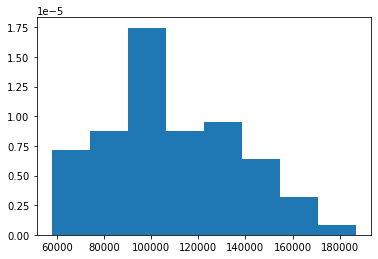

In [ ]:
## matplotlib segítségével historgamos adat megjelenítés / Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'],bins=8, density=True)

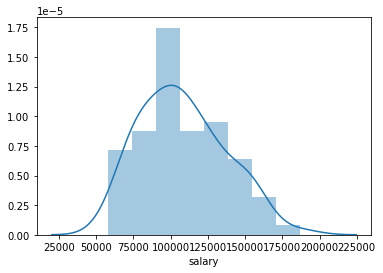

In [ ]:
## seaborn segítségével historgamos adat megjelenítés / Use seaborn package to draw a histogram
sns.distplot(df['salary']);

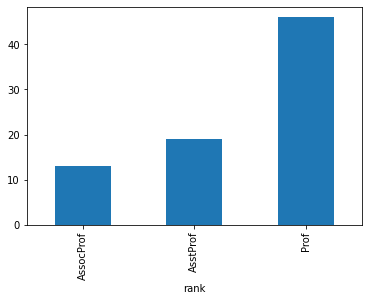

In [ ]:
## Oszlop diagramos megjelenítés matplotlib segítségével / Use regular matplotlib function to display a barplot
df.groupby(['rank'])['salary'].count().plot(kind='bar')

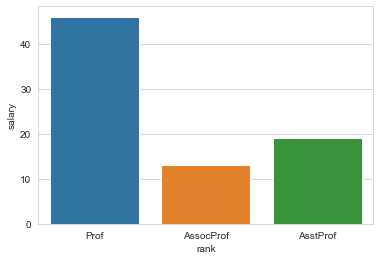

In [ ]:
## Oszlop diagramos megjelenítés seaborn segítségével / Use seaborn package to display a barplot
sns.set_style("whitegrid")
ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)

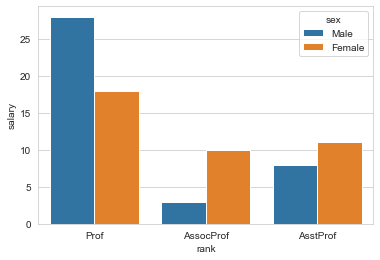

In [ ]:
## Oszlop diagramos megjelenítés seaborn segítségével két támában / Use seaborn package to display a barplot split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len)

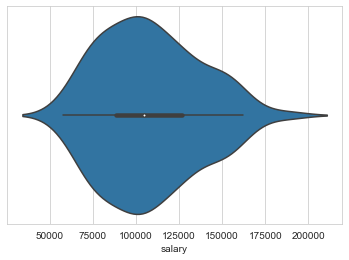

In [ ]:
## Violinplot diagramos megjelenítés seaborn segítségével
sns.violinplot(x = "salary", data=df)

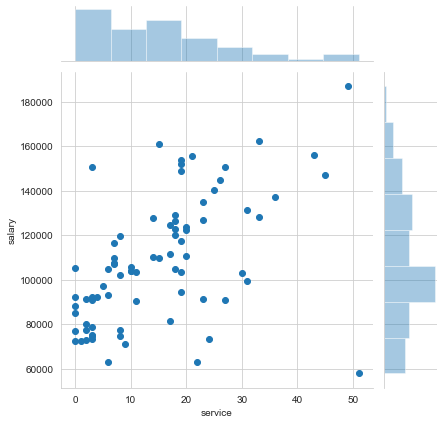

In [ ]:
#Scatterplot diagramos megjelenítés seaborn segítségével
sns.jointplot(x='service', y='salary', data=df)

C:\Users\User\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


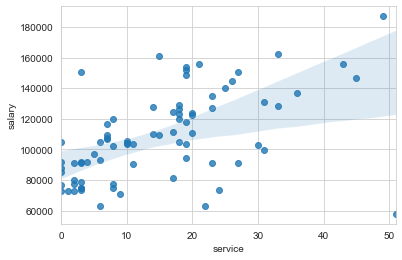

In [ ]:
## linear regresszio diagramos megjelenítés seaborn segítségével / linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='service', y='salary', data=df)

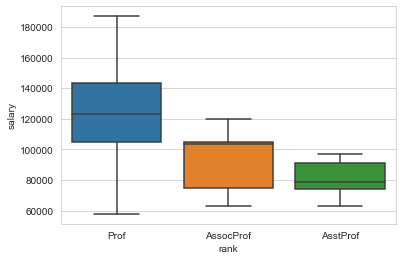

In [ ]:
# box diagramos megjelenítés seaborn segítségével
sns.boxplot(x='rank',y='salary', data=df)

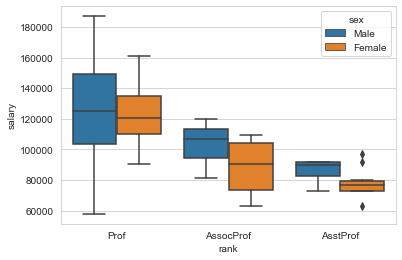

In [ ]:
# side-by-side box diagramos megjelenítés seaborn segítségével
sns.boxplot(x='rank',y='salary', data=df, hue='sex')

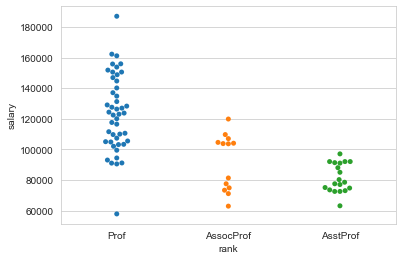

In [ ]:
# swarm diagramos megjelenítés seaborn segítségével
sns.swarmplot(x='rank',y='salary', data=df)

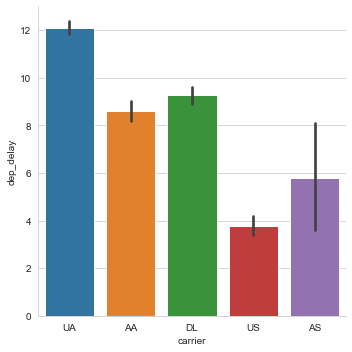

In [ ]:
#factorplot diagramos megjelenítés seaborn segítségével
sns.catplot(x='carrier',y='dep_delay', data=flights, kind='bar')

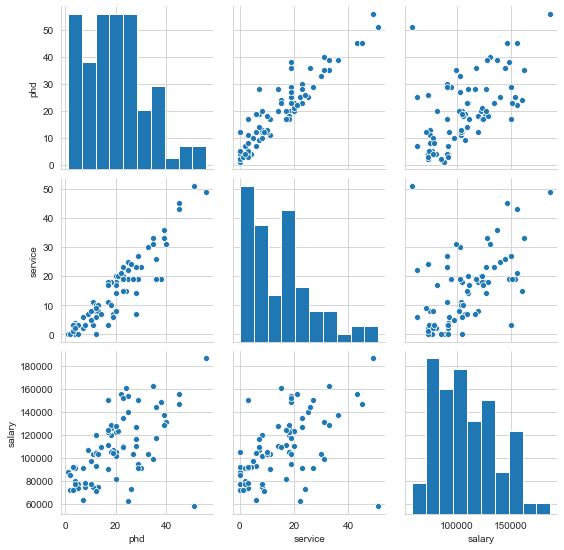

In [ ]:
# Pairplot diagramos megjelenítés seaborn segítségével
sns.pairplot(df)

---

## Alapvető statisztikai elemzések / Basic statistical Analysis

---

### Linear Regression

In [ ]:
## Statsmodel használata
import statsmodels.formula.api as smf

# modell létrtehozása / create a fitted model
lm = smf.ols(formula='salary ~ service', data=df).fit()

## összegzések /  summary
print(lm.summary())

print ('--------------------')

print(lm.params)

print ('--------------------')

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     30.03
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           5.31e-07
Time:                        15:36:59   Log-Likelihood:                -896.72
No. Observations:                  78   AIC:                             1797.
Df Residuals:                      76   BIC:                             1802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.935e+04   4365.651     20.468      0.0

In [ ]:
## scikit-learn használata / using scikit-learn
from sklearn import linear_model
est = linear_model.LinearRegression(fit_intercept = True)   # create estimator object
est.fit(df[['service']], df[['salary']])

## eredmény / print result
print("Coef:", est.coef_, "\nIntercept:", est.intercept_)


Coef: [[1240.3566535]] 
Intercept: [89354.82421525]
